<a href="https://colab.research.google.com/github/mturcic1/MyPortfolio/blob/main/US_congress_representatives_stock_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure
import requests

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

In [91]:
response =requests.get(url="https://house-stock-watcher-data.s3-us-west-2.amazonaws.com/data/all_transactions.json")
response.raise_for_status()

data = response.json()
df = pd.DataFrame(data)

In [92]:
df.head()

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,state,ptr_link,cap_gains_over_200_usd,industry,sector,party
0,2021,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,NC,https://disclosures-clerk.house.gov/public_dis...,False,Integrated oil Companies,Energy,Republican
1,2021,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,NC,https://disclosures-clerk.house.gov/public_dis...,False,Integrated oil Companies,Energy,Republican
2,2021,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,NC,https://disclosures-clerk.house.gov/public_dis...,False,Real Estate Investment Trusts,Real Estate,Republican
3,2021,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,NC,https://disclosures-clerk.house.gov/public_dis...,False,Farming/Seeds/Milling,Consumer Non-Durables,Republican
4,2021,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,CA,https://disclosures-clerk.house.gov/public_dis...,False,Investment Bankers/Brokers/Service,Finance,Democrat


In [93]:
#keeping only republicans and democrats in data
df = df.loc[(df["party"] == "Republican") | (df["party"] == "Democrat")]

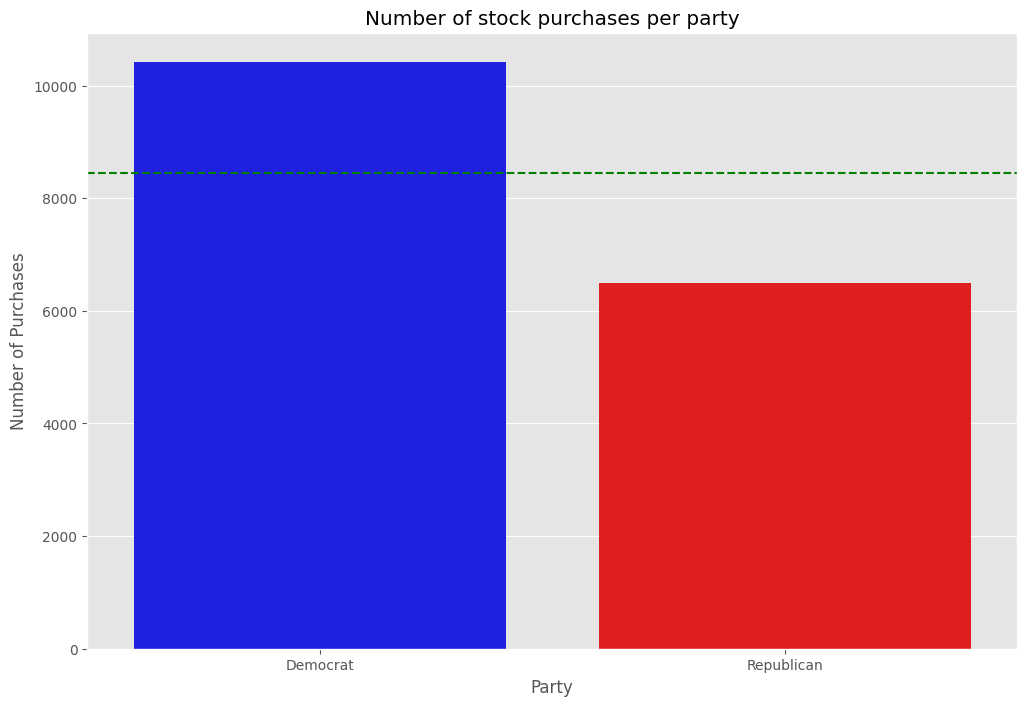

In [94]:
# Plot of total number of purchases.
party_counts = df.groupby('party')['disclosure_year'].count().reset_index()
party_counts = party_counts.sort_values(by='disclosure_year', ascending=False)
avg_purchases = party_counts['disclosure_year'].mean()
#adding colors
colors = {'Democrat': 'blue', 'Republican': 'red'}
# plotting
ax = sns.barplot(x='party', y='disclosure_year', data=party_counts, palette=colors)
plt.title('Number of stock purchases per party')
plt.xlabel('Party')
plt.ylabel('Number of Purchases')
# adding mean line
plt.axhline(y=avg_purchases, color='g', linestyle='--')

In [95]:
#Rows with gains over 200 usd
big_gains = df.loc[df["cap_gains_over_200_usd"] == True]

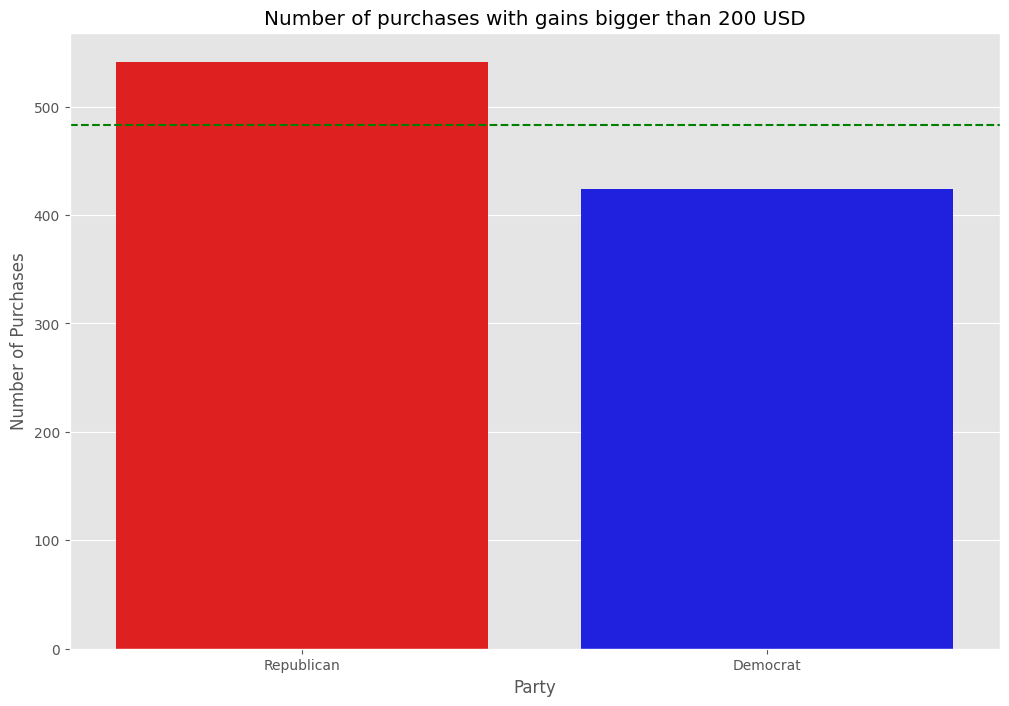

In [96]:
# Plot ofnumber of purchases with gains over 200 usd.
party_counts = big_gains.groupby('party')['disclosure_year'].count().reset_index()
party_counts = party_counts.sort_values(by='disclosure_year', ascending=False)
avg_purchases = party_counts['disclosure_year'].mean()
#adding colors
colors = {'Democrat': 'blue', 'Republican': 'red'}
# plotting
ax = sns.barplot(x='party', y='disclosure_year', data=party_counts, palette=colors)
plt.title('Number of purchases with gains bigger than 200 USD')
plt.xlabel('Party')
plt.ylabel('Number of Purchases')
# adding mean line
plt.axhline(y=avg_purchases, color='g', linestyle='--')

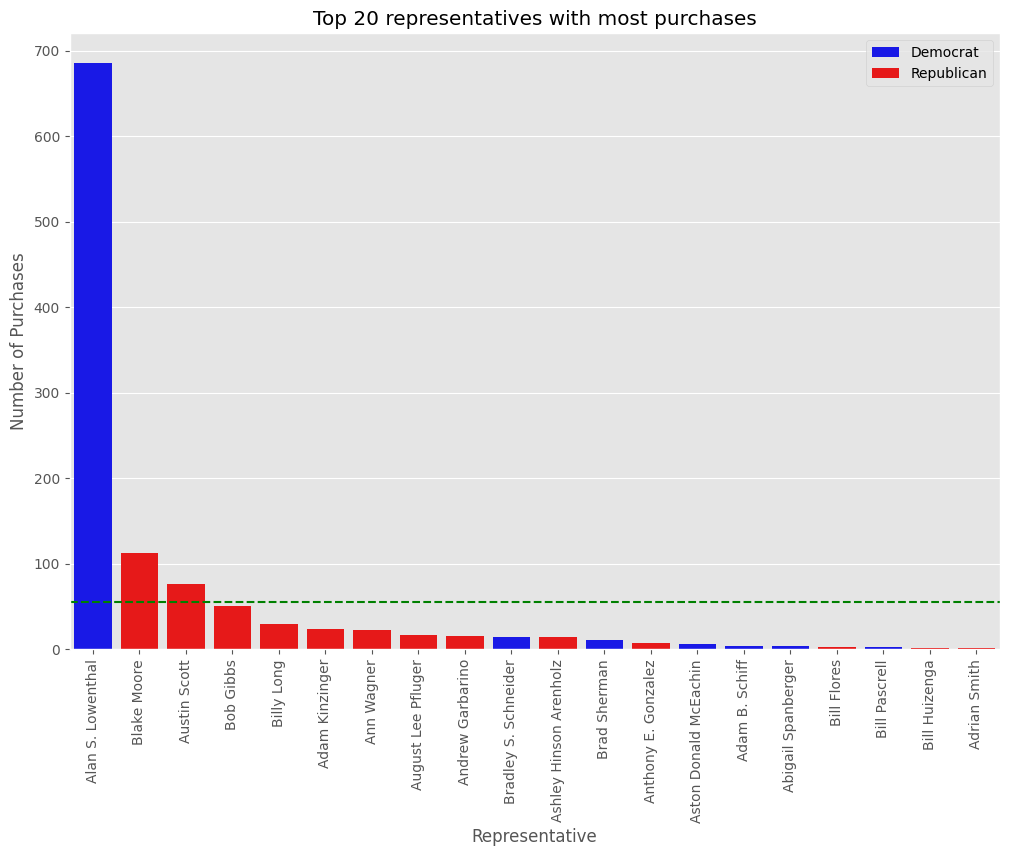

In [97]:
# Plot representatives with higest number of purchases.
representative_counts = df.groupby('representative')['disclosure_year'].count().reset_index().head(20)
representative_counts = representative_counts.sort_values(by='disclosure_year', ascending=False)
avg_purchases = representative_counts['disclosure_year'].mean()
# rejoining "party" column
party_column_df = df.drop_duplicates(subset=['representative'])
party_column_df = party_column_df.loc[:,["representative", "party"]]
representative_counts = representative_counts.merge(party_column_df, on="representative", how="left")
# plotting
ax = sns.barplot(x='representative', y='disclosure_year', data=representative_counts, hue="party", palette={"Democrat": "blue", "Republican": "red"}, dodge=False, saturation=0.8)
plt.title("Top 20 representatives with most purchases")
plt.xlabel('Representative')
plt.ylabel('Number of Purchases')
plt.legend(loc='upper right')
# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# adding mean line
plt.axhline(y=avg_purchases, color='g', linestyle='--')

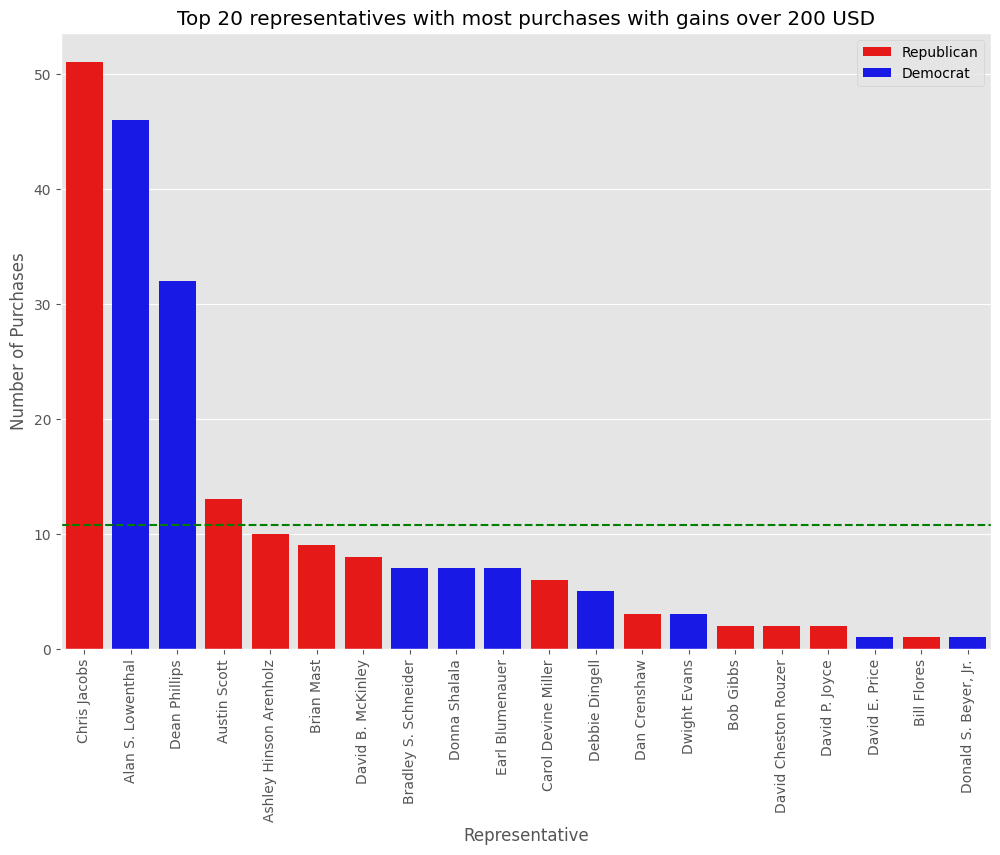

In [98]:
# Plot representatives with higest number of purchases with gains over 200 USD.
representative_counts = big_gains.groupby('representative')['disclosure_year'].count().reset_index().head(20)
representative_counts = representative_counts.sort_values(by='disclosure_year', ascending=False)
avg_purchases = representative_counts['disclosure_year'].mean()
# rejoining "party" column
party_column_df = df.drop_duplicates(subset=['representative'])
party_column_df = party_column_df.loc[:,["representative", "party"]]
representative_counts = representative_counts.merge(party_column_df, on="representative", how="left")
# plotting
ax = sns.barplot(x='representative', y='disclosure_year', data=representative_counts, hue="party", palette={"Democrat": "blue", "Republican": "red"}, dodge=False, saturation=0.8)
plt.title("Top 20 representatives with most purchases with gains over 200 USD")
plt.xlabel('Representative')
plt.ylabel('Number of Purchases')
plt.legend(loc='upper right')
# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# adding mean line
plt.axhline(y=avg_purchases, color='g', linestyle='--')

In [99]:
# converting strings to datetime objects
df["transaction_date"] = pd.to_datetime(df["transaction_date"], errors = 'coerce')
df["disclosure_date"] = pd.to_datetime(df["disclosure_date"], errors = 'coerce')

Text(0, 0.5, 'Number of transactions')

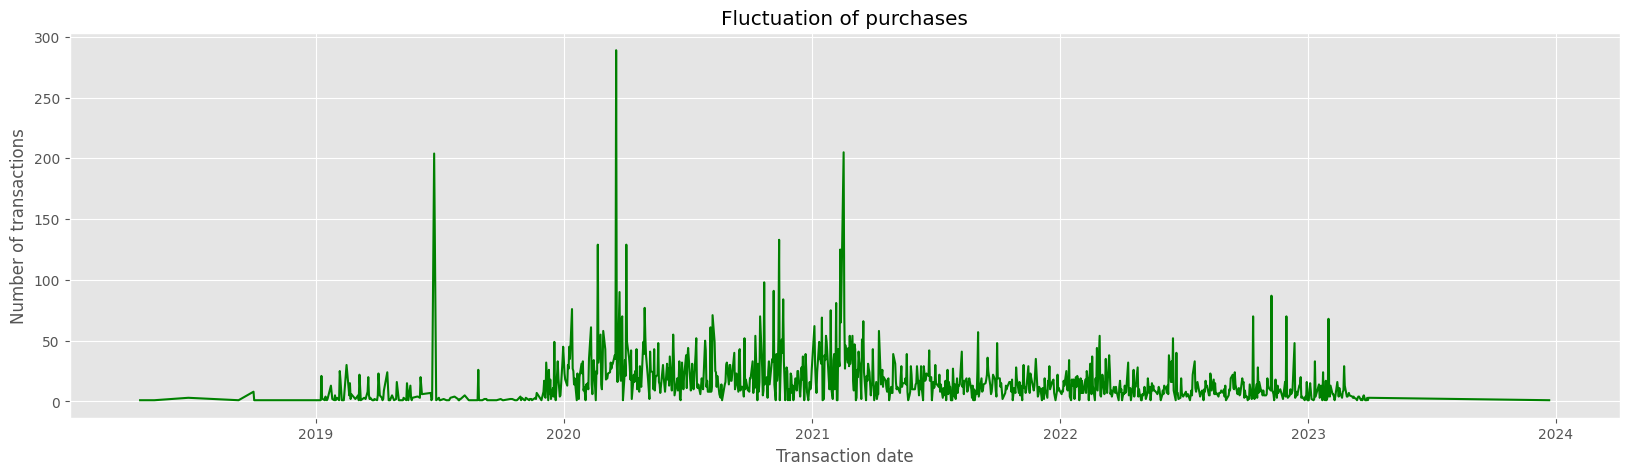

In [100]:
# Plot flutuation of purchases
# Pick only transactions after 2018
df_after_2018 = df.loc[df["transaction_date"] > "2018-01-01"]
purchase_counts = df_after_2018.groupby('transaction_date')['asset_description'].count().reset_index()
# plotting
ax = plt.subplots(figsize=(20, 5))
ax = sns.lineplot(x='transaction_date', y='asset_description', data=purchase_counts, color="green")
plt.title('Fluctuation of purchases')
plt.xlabel('Transaction date')
plt.ylabel('Number of transactions')


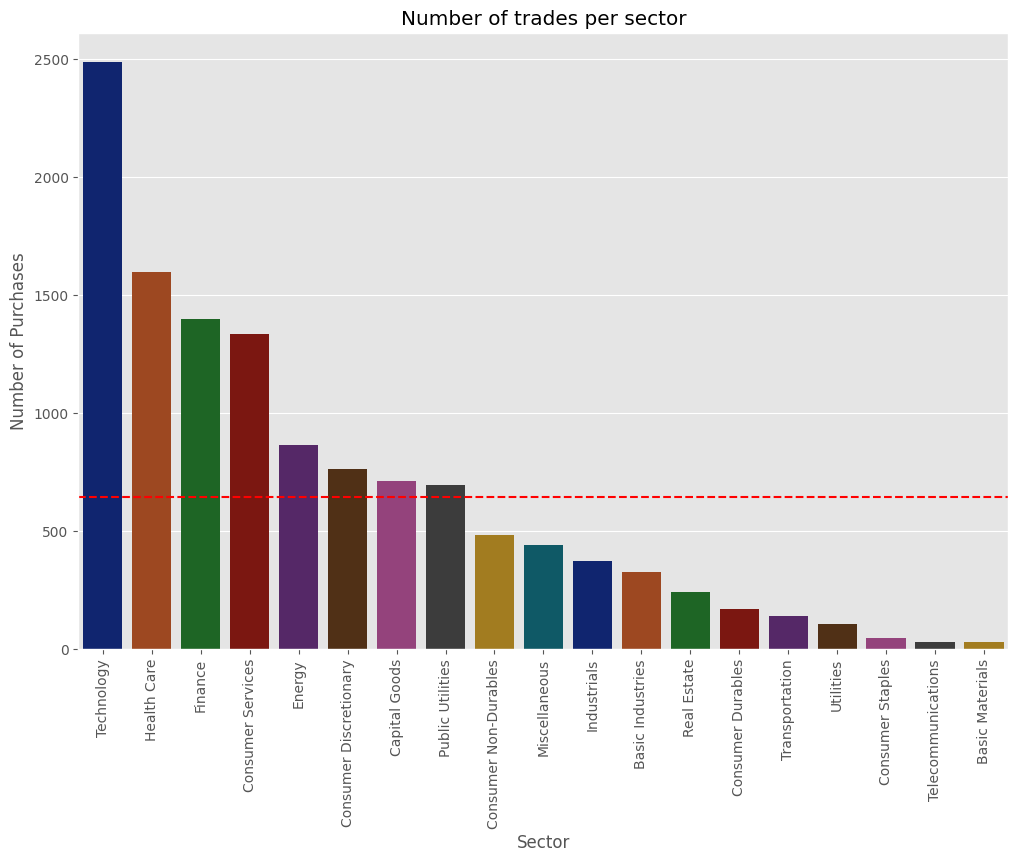

In [111]:
# Plot purhases by sector
sector_counts = df.groupby('sector')['disclosure_year'].count().reset_index()
sector_counts = sector_counts.sort_values(by='disclosure_year', ascending=False)
avg_purchases = sector_counts['disclosure_year'].mean()

# plotting
ax = sns.barplot(x='sector', y='disclosure_year', data=sector_counts, palette="dark")
plt.title('Number of trades per sector')
plt.xlabel('Sector')
plt.ylabel('Number of Purchases')
# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# adding mean line
plt.axhline(y=avg_purchases, color='r', linestyle='--')

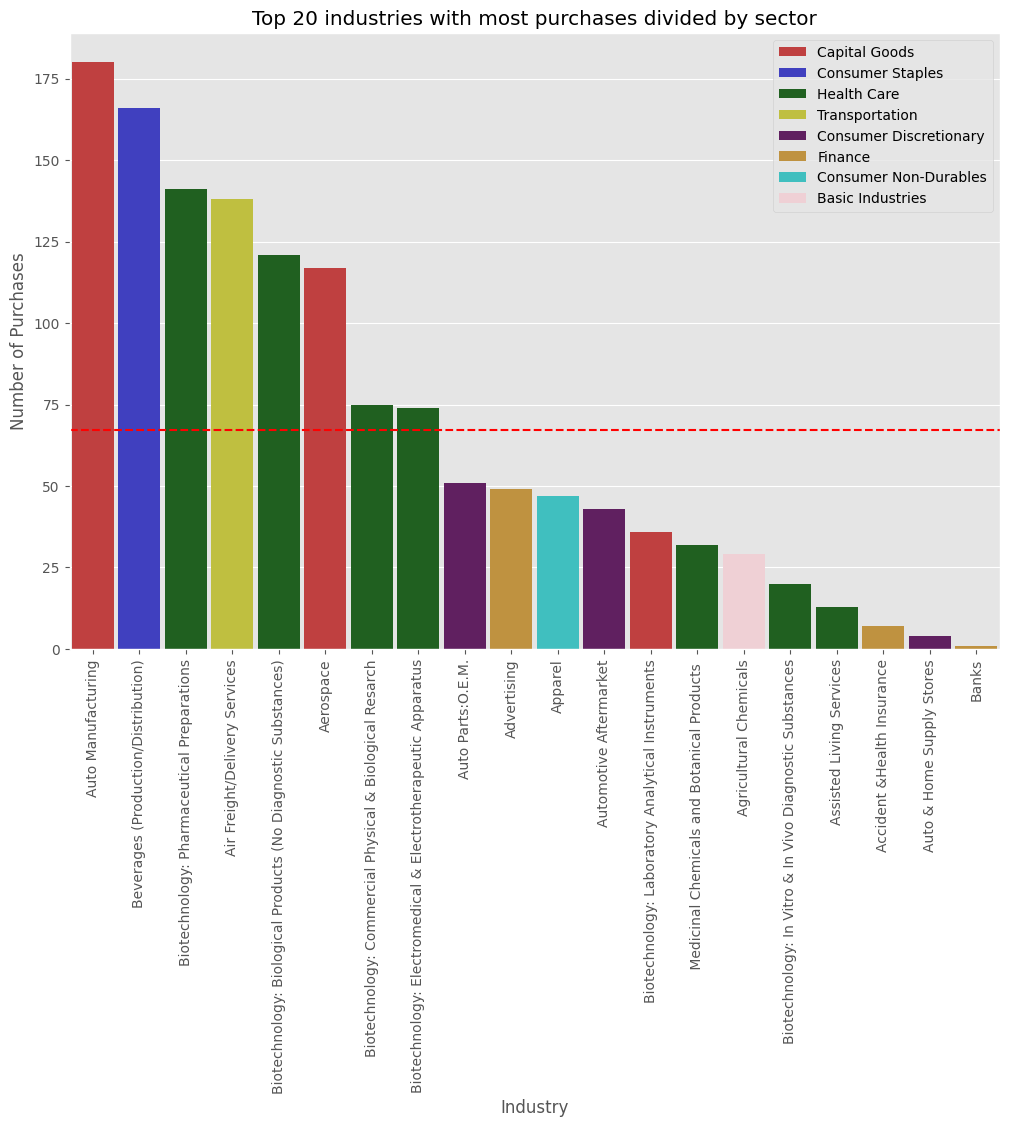

In [112]:
# Plot sectors with higest number of purchases
sector_counts = df.groupby('industry')['disclosure_year'].count().reset_index().head(20)
sector_counts = sector_counts.sort_values(by='disclosure_year', ascending=False)
avg_purchases = sector_counts['disclosure_year'].mean()
# rejoining "sector" column
party_column_df = df.drop_duplicates(subset=['industry'])
party_column_df = party_column_df.loc[:,["industry", "sector"]]
sector_counts = sector_counts.merge(party_column_df, on="industry", how="left")
# adding color
colors = {"Capital Goods": "red", "Consumer Staples": "blue", "Health Care": "green", "Transportation": "yellow", 
          "Consumer Discretionary": "purple", "Finance": "orange", "Consumer Non-Durables": "cyan", "Basic Industries": "pink"}
# plotting
ax = sns.barplot(x='industry', y='disclosure_year', data=sector_counts, hue="sector", palette=colors, width=0.9, dodge=False, saturation=0.5)
plt.title("Top 20 industries with most purchases divided by sector")
plt.xlabel('Industry')
plt.ylabel('Number of Purchases')
plt.legend(loc='upper right')
# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# adding mean line
plt.axhline(y=avg_purchases, color='r', linestyle='--')

In [117]:
# adding full names to state abbrevations
state_names = {"AL": "Alabama",	"KY":	"Kentucky",	"OH":	"Ohio",
"AK": "Alaska", "LA":	"Louisiana",	"OK": "Oklahoma",
"AZ": "Arizona", "ME":	"Maine", "OR":	"Oregon",
"AR": "Arkansas",	"MD":	"Maryland",	"PA":	"Pennsylvania",
"AS": "American Samoa",	"MA":	"Massachusetts",	"PR":	"Puerto Rico",
"CA": "California",	"MI":	"Michigan",	"RI":	"Rhode Island",
"CO": "Colorado",	"MN":	"Minnesota", "SC":	"South Carolina",
"CT": "Connecticut", "MS":	"Mississippi",	"SD":	"South Dakota",
"DE": "Delaware",	"MO":	"Missouri",	"TN":	"Tennessee",
"DC": "District of Columbia", "MT":	"Montana",	"TX":	"Texas",
"FL": "Florida", "NE":	"Nebraska",	"TT":	"Trust Territories",
"GA": "Georgia",	"NV":	"Nevada",	"UT":	"Utah",
"GU": "Guam", "NH":	"New Hampshire",	"VT":	"Vermont",
"HI": "Hawaii",	"NJ":	"New Jersey",	"VA":	"Virginia",
"ID": "Idaho",	"NM":	"New Mexico",	"VI":	"Virgin Islands",
"IL": "Illinois",	"NY":	"New Yor",	"WA":	"Washington",	
"IN": "Indiana", "NC":	"North Carolina",	"WV":	"West Virginia",
"IA": "Iowa",	"ND":	"North Dakota",	"WI":	"Wisconsin",
"KS": "Kansas", "MP":	"Northern Mariana Islands",	"WY":	"Wyoming"
}
df['full_states'] = df["state"].map(state_names)
big_gains['full_states'] = big_gains["state"].map(state_names)

<ipython-input-117-34e3a03e2d80>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_gains['full_states'] = big_gains["state"].map(state_names)


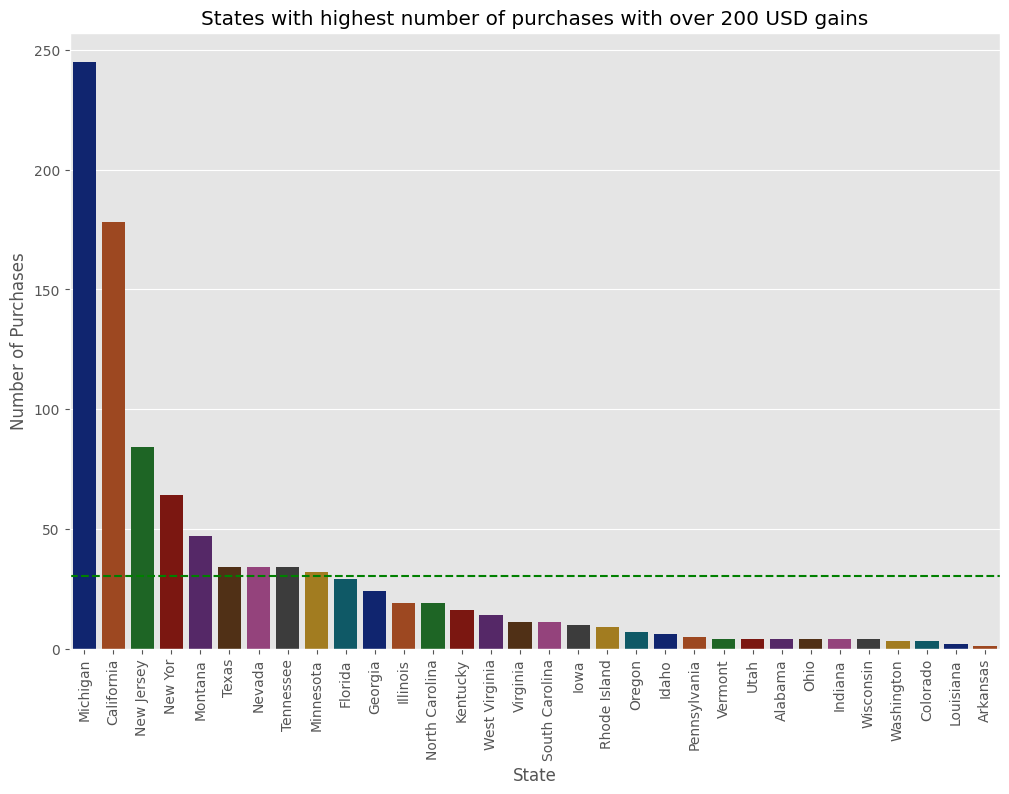

In [118]:
# Plot of number of purchases with gains over 200 usd.
state_counts = big_gains.groupby('full_states')['disclosure_year'].count().reset_index()
state_counts = state_counts.sort_values(by='disclosure_year', ascending=False)
avg_purchases = state_counts['disclosure_year'].mean()

# plotting
ax = sns.barplot(x='full_states', y='disclosure_year', data=state_counts, palette="dark")
plt.title('States with highest number of purchases with over 200 USD gains')
plt.xlabel('State')
plt.ylabel('Number of Purchases')
# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# adding mean line
plt.axhline(y=avg_purchases, color='g', linestyle='--')

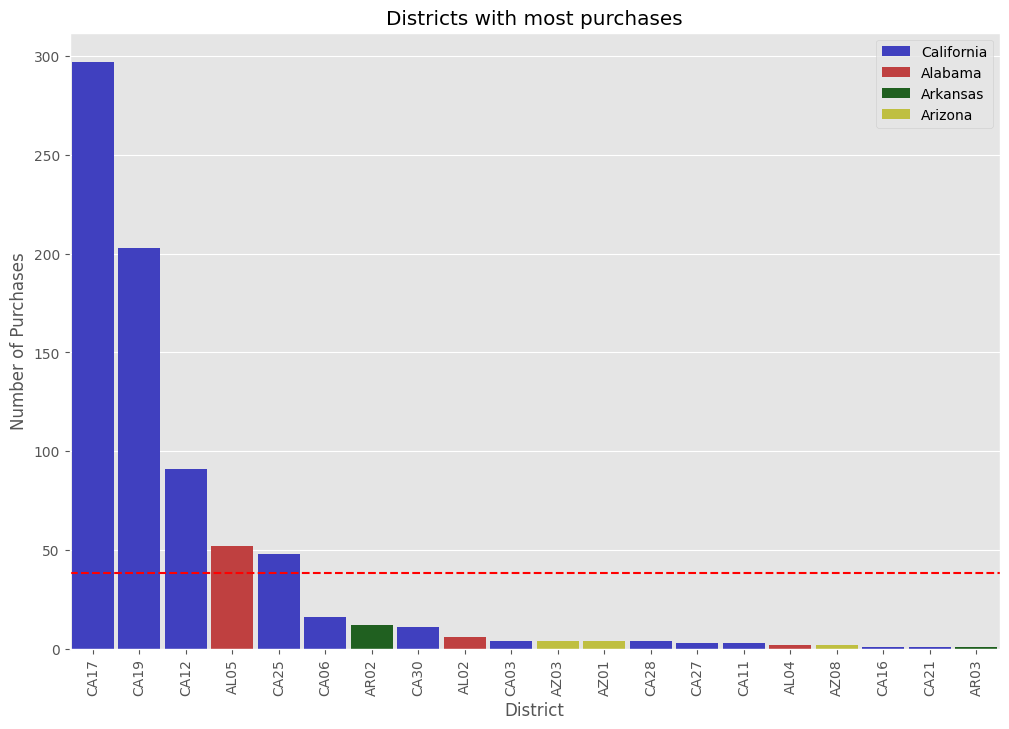

In [120]:
# Plot districts with most purchases
district_counts = df.groupby('district')['disclosure_year'].count().reset_index().head(20)
district_counts = district_counts.sort_values(by='disclosure_year', ascending=False)
avg_purchases = district_counts['disclosure_year'].mean()
# rejoining "full_states" column
party_column_df = df.drop_duplicates(subset=['district'])
party_column_df = party_column_df.loc[:,["district", "full_states"]]
district_counts = district_counts.merge(party_column_df, on="district", how="left")
# adding color
colors = {"Alabama": "red", "California": "blue", "Arkansas": "green", "Arizona": "yellow"}
# plotting
ax = sns.barplot(x='district', y='disclosure_year', data=district_counts, hue="full_states", palette=colors, width=0.9, dodge=False, saturation=0.5)
plt.title("Districts with most purchases")
plt.xlabel('District')
plt.ylabel('Number of Purchases')
plt.legend(loc='upper right')
# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# adding mean line
plt.axhline(y=avg_purchases, color='r', linestyle='--')

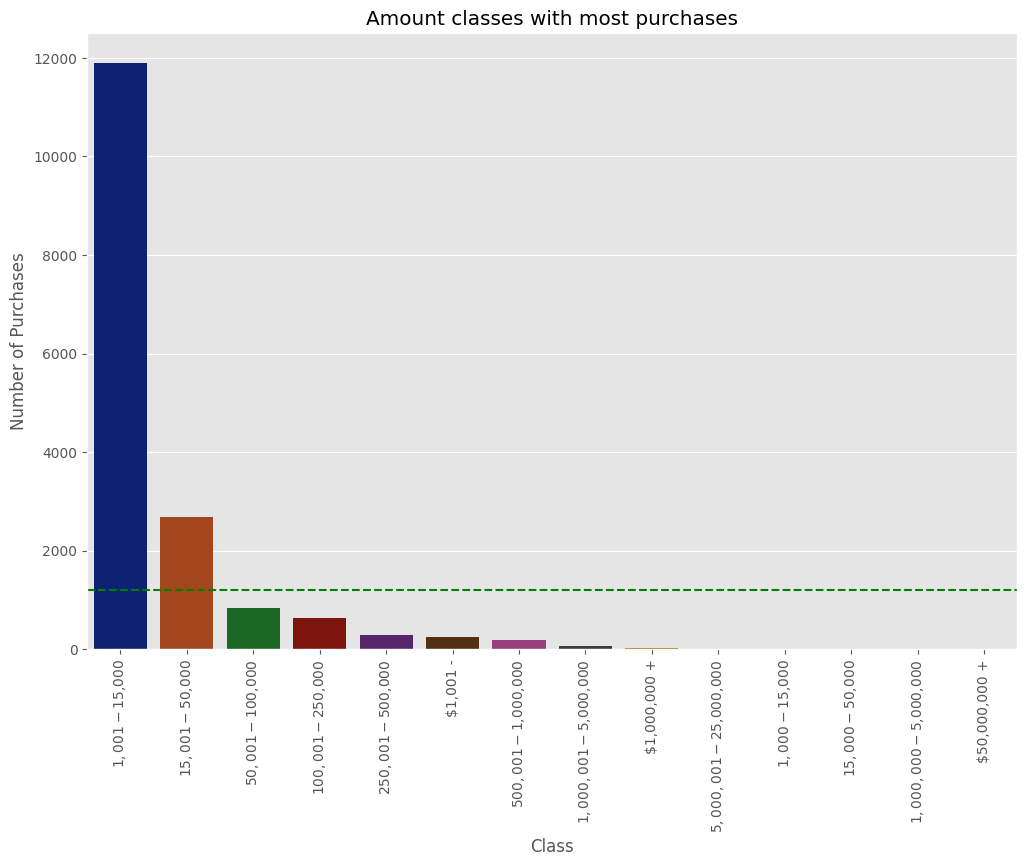

In [121]:
# Plot amount classes
amount_counts = df.groupby('amount')['disclosure_year'].count().reset_index().head(20)
amount_counts = amount_counts.sort_values(by='disclosure_year', ascending=False)
avg_purchases = amount_counts['disclosure_year'].mean()

# plotting
ax = sns.barplot(x='amount', y='disclosure_year', data=amount_counts, dodge=False, saturation=0.8, palette="dark")
plt.title("Amount classes with most purchases")
plt.xlabel('Class')
plt.ylabel('Number of Purchases')
# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# adding mean line
plt.axhline(y=avg_purchases, color='g', linestyle='--')